In [1]:
import matplotlib.pylab as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

In [2]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[-6.3006834 ,  8.05095329],
       [-1.43911477, -7.2365467 ],
       [-0.07245878, -7.97994461],
       ...,
       [ 6.75643569,  2.61405917],
       [-0.0421195 , -8.86491571],
       [-0.71862339, -7.18343449]], shape=(1000, 2))

In [4]:
y

array([2, 0, 0, 2, 0, 2, 1, 0, 0, 1, 0, 0, 1, 2, 1, 2, 0, 1, 2, 1, 0, 1,
       2, 0, 2, 0, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 0, 2, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 2, 1, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 1, 0,
       2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 0, 2, 2, 2, 0, 1, 2, 2, 0, 0, 0, 1,
       2, 2, 0, 0, 1, 2, 0, 1, 0, 2, 2, 1, 0, 2, 2, 2, 0, 1, 2, 0, 1, 0,
       2, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 2,
       2, 0, 1, 0, 2, 2, 2, 0, 0, 1, 0, 1, 0, 2, 0, 1, 1, 0, 2, 1, 1, 2,
       2, 2, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 1, 2, 0, 2, 1,
       1, 2, 2, 0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 1, 0,
       0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2,
       2, 1, 0, 1, 1, 1, 2, 0, 0, 2, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0,
       1, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 1, 1, 2, 0,

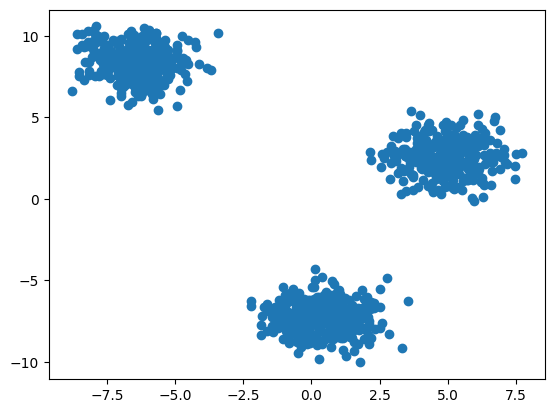

In [5]:
plt.scatter(X[:,0],X[:,1])

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler(
)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [10]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [11]:
from sklearn.cluster import KMeans



In [12]:
# Implementing Elbow method as shown in theory
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit_transform(X_train_scaled)
    wcss.append(kmeans.inertia_)

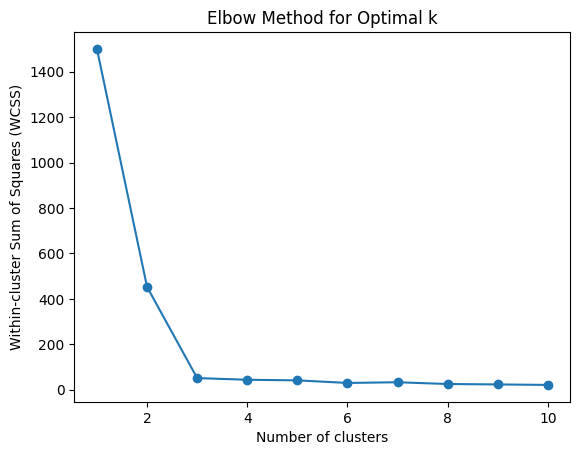

In [13]:
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [14]:
y_train_pred = kmeans.predict(X_train_scaled)
y_test_pred = kmeans.predict(X_test_scaled)

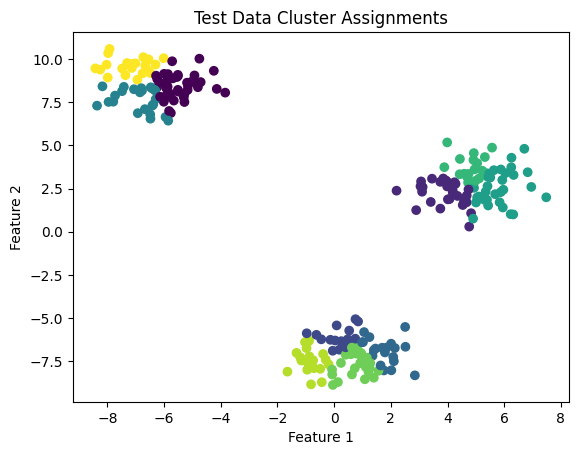

In [15]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred)
plt.title('Test Data Cluster Assignments')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
#Validation of number of k selected:
#2 methods:
# kneed
# silhoutte clustering

In [17]:
#KNEED
!pip install kneed

In [18]:
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

k_range = range(1, 11)
knee_locator = KneeLocator(k_range, wcss, curve='convex', direction='decreasing')
optimal_k = knee_locator.elbow
print(f"Optimal number of clusters according to KneeLocator: {optimal_k}")

Optimal number of clusters according to KneeLocator: 3


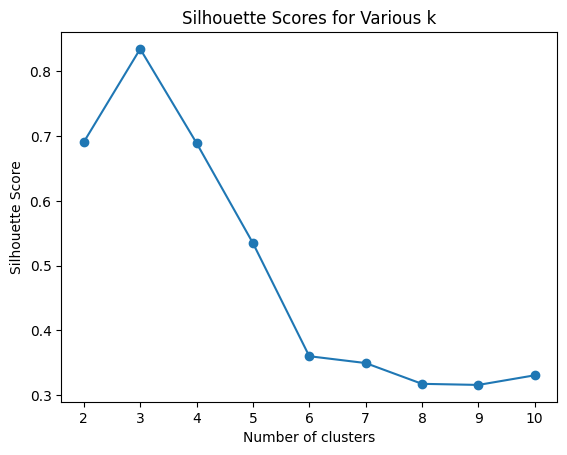

In [19]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Various k')
plt.show()